# Identificação de Fraudes em Cartões de Crédito

Neste projeto, nosso objetivo é identificar fraudes em transações de cartões de crédito utilizando um conjunto de dados fornecido. A seguir, apresentamos as informações da base de dados e o que cada variável representa:

### Informações da Base:

- **Time (tempo)**: Representa os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. Esta variável ajuda a entender a sequência temporal das transações.

- **Amount (valor)**: O valor da transação. Esta variável é crucial para identificar padrões de transações fraudulentas que podem ter valores atípicos em comparação com as transações legítimas.

- **Class (classe)**: A variável resposta que indica se a transação é fraudulenta ou não. Assume o valor 1 em caso de fraude e 0 caso contrário. Esta é a variável que tentamos prever com base nas outras características.

Devido a questões de confidencialidade, não temos acesso aos recursos originais e às informações básicas detalhadas sobre os dados. No entanto, as características V1, V2, ..., V28 representam componentes principais obtidos através da Análise de Componentes Principais (PCA). Estas características foram transformadas para preservar a informação relevante enquanto reduzem a dimensionalidade do conjunto de dados.

Vamos agora explorar os dados e construir um modelo para detectar possíveis fraudes com base nas informações fornecidas.


### Importação de Bibliotecas e Configuração Inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

### Importação da Base de Dados

In [2]:
base = pd.read_csv('creditcard.csv')

### Análise Exploratória dos Dados (EDA)

A Análise Exploratória dos Dados (EDA) é uma etapa essencial para entender melhor o conjunto de dados e preparar para a modelagem. Nesta seção, vamos explorar as características da base de dados

#### Visualização das Primeiras Linhas da Base de Dados

In [3]:
base.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Informações Gerais sobre a Base de Dados

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Estatísticas Descritivas da Base de Dados

In [5]:

base.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Verificação de Transações com Valor Zero

In [6]:
base.loc[base.Amount == 0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


#### Verificação de Entradas Duplicadas

In [7]:
display(base.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

#### Verificação de Valores Nulos


In [8]:
base.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Percentual de Fraudes na base de dados

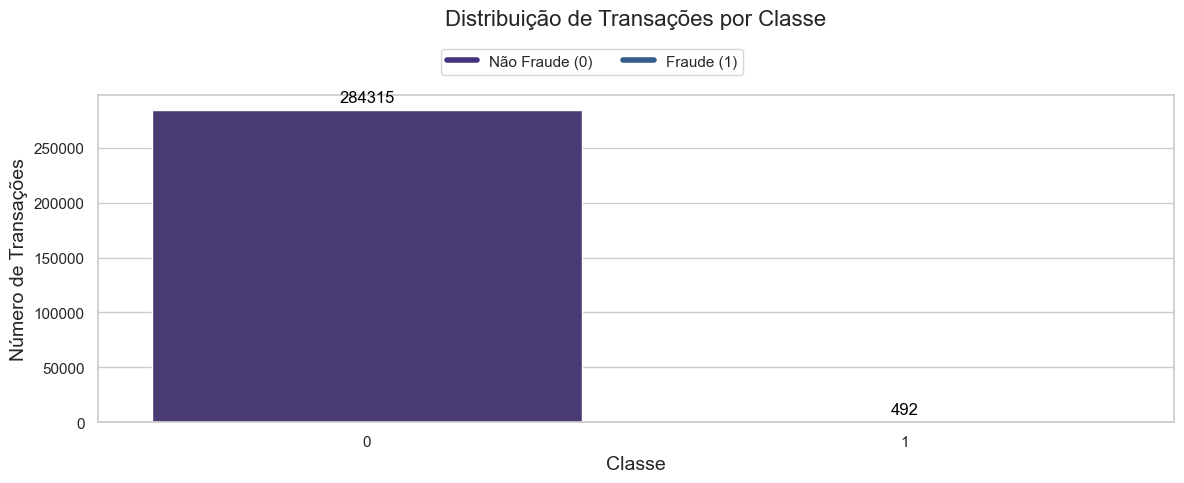

In [9]:
total_fraudes = base.Class.value_counts()
sns.set(style="whitegrid")
palette = sns.color_palette('viridis')

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=total_fraudes.index.astype(str), y=total_fraudes.values, palette=palette, ax=ax)
ax.set_xlabel('Classe', fontsize=14)
ax.set_ylabel('Número de Transações', fontsize=14)
ax.set_title('Distribuição de Transações por Classe', fontsize=16, pad=50)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center',
                xytext=(0, 9), 
                textcoords='offset points', 
                fontsize=12, color='black')

handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(total_fraudes))]
labels = ['Não Fraude (0)', 'Fraude (1)']
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=2)

plt.tight_layout()
plt.show()

### Criação do Modelo de Identificação de Fraudes

Agora construiremos um modelo de detecção de fraudes utilizando a base de dados conforme ela é, sem aplicar nenhum tratamento prévio. Este processo nos permitirá avaliar o desempenho do modelo em seu estado bruto e compreender o impacto da ausência de pré-processamento na sua eficácia.


#### Separação das variáveis Independentes e Dependentes

In [10]:
x = base.drop('Class', axis=1)
y = base.Class

#### Separação dos dados em conjuntos de Treino e Teste


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42, stratify=y)

#### Importando a Árvore de Decisão

In [12]:
#Importando a árvore de decisão
from sklearn import tree

#### Definição e treinamento do classificador de Árvore de Decisão

In [13]:
clf = tree.DecisionTreeClassifier(random_state=42).fit(x_train,y_train)

#### Realização de previsões com o classificador de Árvore de Decisão


In [14]:
#Fazendo a previsão:
y_pred_arv = clf.predict(x_test)

#### Métricas de avaliação do modelo

- **Acurácia**: Proporção de previsões corretas em relação ao total de previsões.
- **Matriz de Confusão**: Tabela que mostra o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
- **Precisão**: Proporção de previsões positivas corretas em relação ao total de previsões positivas feitas.
- **Recall**: Proporção de verdadeiros positivos identificados corretamente em relação ao total de positivos reais.


In [15]:
from sklearn import metrics

In [16]:
print('Acurácia:')
print(metrics.accuracy_score(y_test, y_pred_arv))
print('')
print('Matriz de confusão:')
print(metrics.confusion_matrix(y_test,y_pred_arv))
print('')
print('Precisão:')
print(metrics.precision_score(y_test,y_pred_arv))
print('')
print('Recall:')
print(metrics.recall_score(y_test,y_pred_arv))

Acurácia:
0.9991594582229457

Matriz de confusão:
[[93786    39]
 [   40   122]]

Precisão:
0.7577639751552795

Recall:
0.7530864197530864


#### Desbalanceamento da base de dados

- Observamos que a base de dados está significativamente desbalanceada, com uma quantidade muito maior de transações não fraudulentas (classe 0) em comparação com transações fraudulentas (classe 1). Esse desbalanceamento pode levar a um modelo que simplesmente prevê a classe majoritária (0) na maioria das vezes, resultando em um desempenho insatisfatório na detecção de fraudes.

#### Abordagem para lidar com o desbalanceamento

Para enfrentar o problema do desbalanceamento de classes na base de dados, temos duas principais opções:

- **Reduzir a Classe Majoritária**: Diminui o número de amostras da classe não fraudulenta (classe 0) para equilibrar o conjunto de dados.
- **Aumentar a Classe Minoritária**: Aumenta o número de amostras da classe fraudulenta (classe 1) para equilibrar o conjunto de dados.

Optamos por **reduzir a classe majoritária**. Essa abordagem ajudará a criar um conjunto de dados mais balanceado e permitirá que o modelo se concentre melhor na identificação de transações fraudulentas.


In [17]:
from imblearn.under_sampling import RandomUnderSampler

#### Implementação do RandomUnderSampler

In [18]:
rus = RandomUnderSampler(random_state=42)

#### Aplicação da Subamostragem

In [19]:
x_resRU, y_resRU = rus.fit_resample(x_train,y_train)

#### Visualização da isdtribuição das classes após o UnderSampler

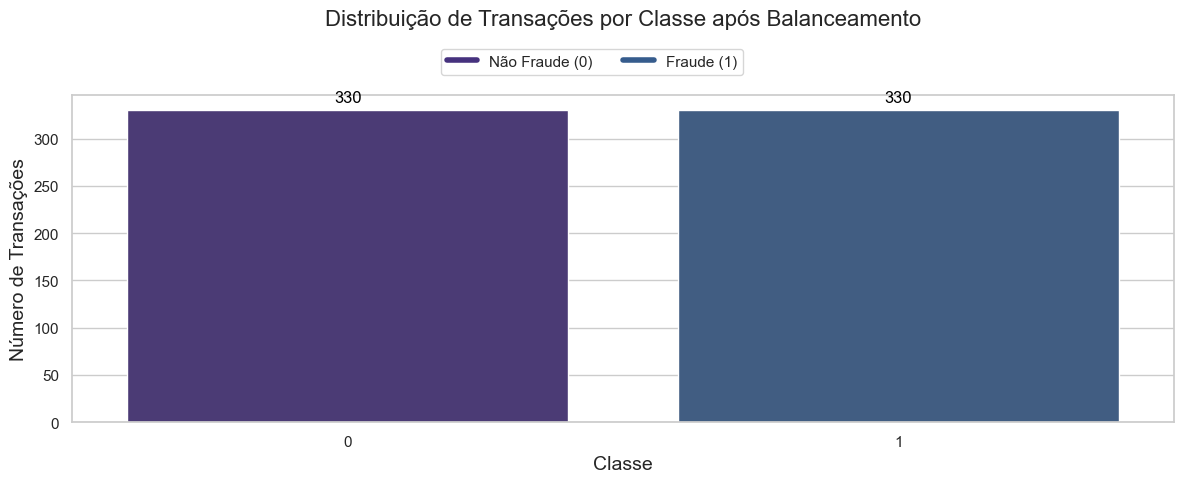

In [20]:
total_fraudes = y_resRU.value_counts()
sns.set(style="whitegrid")
palette = sns.color_palette('viridis')

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=total_fraudes.index.astype(str), y=total_fraudes.values, palette=palette, ax=ax)
ax.set_xlabel('Classe', fontsize=14)
ax.set_ylabel('Número de Transações', fontsize=14)
ax.set_title('Distribuição de Transações por Classe após Balanceamento', fontsize=16, pad=50)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center',
                xytext=(0, 9), 
                textcoords='offset points', 
                fontsize=12, color='black')

handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(total_fraudes))]
labels = ['Não Fraude (0)', 'Fraude (1)']
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=2)

plt.tight_layout()
plt.show()

In [21]:
y_resRU.value_counts()

Class
0    330
1    330
Name: count, dtype: int64

#### Base de dados Balanceada.

- Após a aplicação da técnica de subamostragem, a base de dados agora está totalmente balanceada. Isso significa que o número de amostras de cada classe (fraudulentas e não fraudulentas) é igual, o que facilita um treinamento mais eficaz do modelo de detecção de fraudes.

#### Utilizando novamente a Árvore de Decisão:

In [22]:
clfAR = tree.DecisionTreeClassifier(random_state=42).fit(x_resRU, y_resRU)

In [23]:
y_predAR = clfAR.predict(x_test)
y_predAR_proba = clfAR.predict_proba(x_test)[:,1]

In [24]:
print('Acurácia:')
print(metrics.accuracy_score(y_test, y_predAR))
print('')
print('Matriz de confusão:')
print(metrics.confusion_matrix(y_test, y_predAR))
print('')
print('Precisão:')
print(metrics.precision_score(y_test, y_predAR))
print('')
print('Recall:')
print(metrics.recall_score(y_test, y_predAR))

Acurácia:
0.9004543181503825

Matriz de confusão:
[[84484  9341]
 [   15   147]]

Precisão:
0.015493254637436763

Recall:
0.9074074074074074


#### Melhorias Após o Balanceamento

- Com a base de dados agora balanceada, o modelo tem demonstrado uma capacidade significativamente melhor de identificar fraudes.

### Utilizando a Regressão Logística

- A **Regressão Logística** é um modelo de classificação binária que prevê a probabilidade de uma amostra pertencer a uma classe específica. Utiliza a função sigmoide para converter uma combinação linear das características em uma probabilidade entre 0 e 1. Com base nessa probabilidade, decide a classe da amostra. É amplamente usada para problemas como a detecção de fraudes e tem a vantagem de fornecer uma interpretação clara das previsões probabilísticas.

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clfRL = LogisticRegression(random_state= 0).fit(x_resRU, y_resRU)

In [27]:
y_predRL = clfRL.predict(x_test)
y_predRL_proba = clfRL.predict_proba(x_test)[:,1]

In [28]:
print('Acurácia:')
print(metrics.accuracy_score(y_test, y_predRL))
print('')
print('Matriz de confusão:')
print(metrics.confusion_matrix(y_test, y_predRL))
print('')
print('Precisão:')
print(metrics.precision_score(y_test, y_predRL))
print('')
print('Recall:')
print(metrics.recall_score(y_test, y_predRL))

Acurácia:
0.9513975337014694

Matriz de confusão:
[[89276  4549]
 [   19   143]]

Precisão:
0.030477408354646206

Recall:
0.8827160493827161


#### Utilizando o Suport Vector Machine

- **Support Vector Machine (SVM)** é um modelo de classificação que encontra o melhor hiperplano para separar diferentes classes com a maior margem possível. Usa vetores de suporte para definir essa margem.

In [29]:
from sklearn.svm import SVC

In [30]:
clfSVC = SVC(probability=True, random_state=0).fit(x_resRU, y_resRU)

In [31]:
y_predSVC = clfSVC.predict(x_test)
y_predSVC_proba = clfSVC.predict_proba(x_test)[:,1]

#### Utilizando o KNN

- **K-Nearest Neighbors (KNN)** é um algoritmo de classificação que atribui a classe de uma amostra com base nas classes dos seus *k* vizinhos mais próximos no espaço de características. A classe mais frequente entre esses vizinhos é usada para classificar a amostra.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
clfKNN = KNeighborsClassifier(n_neighbors=3).fit(x_resRU, y_resRU)

In [34]:
y_predKNN = clfKNN.predict(x_test)
y_predKNN_proba = clfKNN.predict_proba(x_test)[:,1]

In [35]:
print('Acurácia:')
print(metrics.accuracy_score(y_test, y_predKNN))
print('')
print('Matriz de confusão:')
print(metrics.confusion_matrix(y_test, y_predKNN))
print('')
print('Precisão:')
print(metrics.precision_score(y_test, y_predKNN))
print('')
print('Recall:')
print(metrics.recall_score(y_test, y_predKNN))

Acurácia:
0.6430676582931683

Matriz de confusão:
[[60332 33493]
 [   54   108]]

Precisão:
0.0032141900538674444

Recall:
0.6666666666666666


#### Utilizando a  Random Forest

- **Random Forest** é um modelo que combina múltiplas árvores de decisão para melhorar a precisão da classificação. Cada árvore é treinada com uma amostra aleatória dos dados e um subconjunto aleatório das características. A previsão final é obtida por votação majoritária das árvores ou pela média das previsões.

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clfRF = RandomForestClassifier(max_depth=2, random_state=0).fit(x_resRU, y_resRU)

In [38]:
y_predRF = clfRF.predict(x_test)
y_predRF_proba = clfRF.predict_proba(x_test)[:,1]

In [39]:
print('Acurácia:')
print(metrics.accuracy_score(y_test, y_predRF))
print('')
print('Matriz de confusão:')
print(metrics.confusion_matrix(y_test, y_predRF))
print('')
print('Precisão:')
print(metrics.precision_score(y_test, y_predRF))
print('')
print('Recall:')
print(metrics.recall_score(y_test, y_predRF))

Acurácia:
0.9927436773170758

Matriz de confusão:
[[93168   657]
 [   25   137]]

Precisão:
0.172544080604534

Recall:
0.845679012345679


### Comparando os modelos

In [40]:
print('Árvore de decisão')
print('Precisão:', metrics.precision_score(y_test, y_predAR))
print('Recall:',metrics.recall_score(y_test, y_predAR))
print('')

print('Regressão Logística')
print('Precisão:',metrics.precision_score(y_test, y_predRL))
print('Recall:',metrics.recall_score(y_test, y_predRL))
print('')

print('SVC')
print('Precisão:',metrics.precision_score(y_test, y_predSVC))
print('Recall:',metrics.recall_score(y_test, y_predSVC))
print('')

print('KNN')
print('Precisão:',metrics.precision_score(y_test, y_predKNN))
print('Recall:',metrics.recall_score(y_test, y_predKNN))
print('')

print('Random Forest')
print('Precisão:',metrics.precision_score(y_test, y_predRF))
print('Recall:',metrics.recall_score(y_test, y_predRF))

Árvore de decisão
Precisão: 0.015493254637436763
Recall: 0.9074074074074074

Regressão Logística
Precisão: 0.030477408354646206
Recall: 0.8827160493827161

SVC
Precisão: 0.002222860975376066
Recall: 0.7160493827160493

KNN
Precisão: 0.0032141900538674444
Recall: 0.6666666666666666

Random Forest
Precisão: 0.172544080604534
Recall: 0.845679012345679


In [41]:
precision_AR, recall_AR, thresolds_AR = metrics.precision_recall_curve(y_test, y_predAR_proba)
precision_RL, recall_RL, thresolds_RL = metrics.precision_recall_curve(y_test, y_predRL_proba)
precision_SVC, recall_SVC, thresolds_SVC = metrics.precision_recall_curve(y_test, y_predSVC_proba)
precision_KNN, recall_KNN, thresolds_KNN = metrics.precision_recall_curve(y_test, y_predKNN_proba)
precision_RF, recall_RF, thresolds_RF = metrics.precision_recall_curve(y_test, y_predRF_proba)

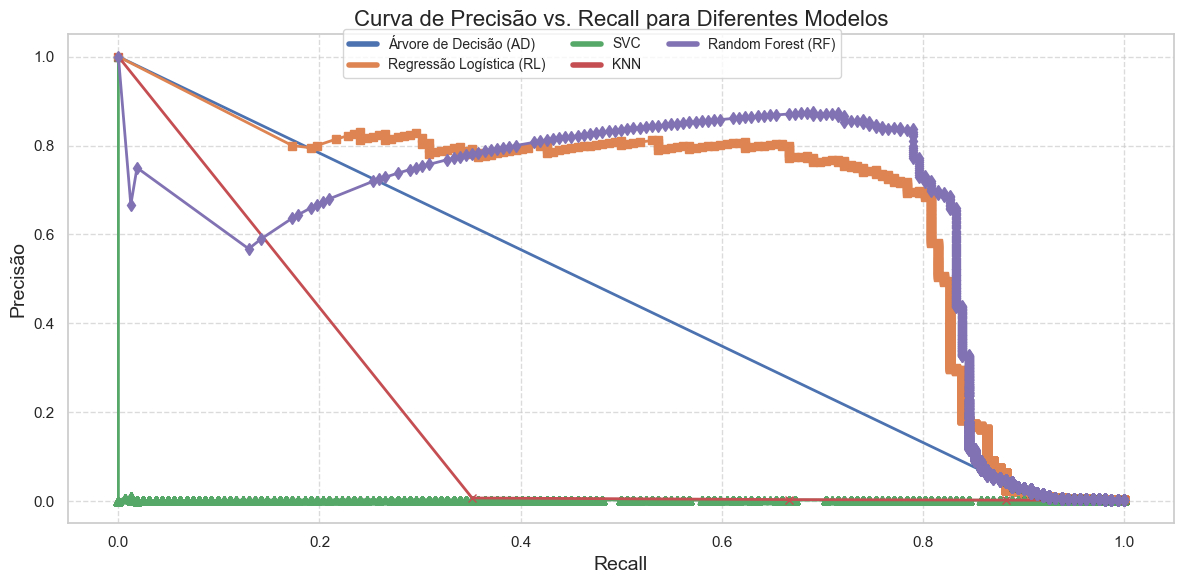

In [42]:
palette = sns.color_palette("deep")

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(recall_AR, precision_AR, linewidth=2.0, linestyle='-', marker='o', color=palette[0], label='Árvore de Decisão (AD)')
ax.plot(recall_RL, precision_RL, linewidth=2.0, linestyle='-', marker='s', color=palette[1], label='Regressão Logística (RL)')
ax.plot(recall_SVC, precision_SVC, linewidth=2.0, linestyle='-', marker='^', color=palette[2], label='SVC')
ax.plot(recall_KNN, precision_KNN, linewidth=2.0, linestyle='-', marker='x', color=palette[3], label='KNN')
ax.plot(recall_RF, precision_RF, linewidth=2.0, linestyle='-', marker='d', color=palette[4], label='Random Forest (RF)')

ax.set_title('Curva de Precisão vs. Recall para Diferentes Modelos', fontsize=16)
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precisão', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(5)]
labels = ['Árvore de Decisão (AD)', 'Regressão Logística (RL)', 'SVC', 'KNN', 'Random Forest (RF)']
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize='10')

plt.tight_layout()
plt.show()

In [43]:
print('Árvore de Decisão:')
print(metrics.auc(recall_AR, precision_AR))
print('')
print('Regressão Logística:')
print(metrics.auc(recall_RL, precision_RL))
print('')
print('SVC')
print(metrics.auc(recall_SVC, precision_SVC))
print('')
print('KNN')
print(metrics.auc(recall_KNN, precision_KNN))
print('')
print('Random Forest')
print(metrics.auc(recall_RF, precision_RF))

Árvore de Decisão:
0.46153012929239556

Regressão Logística:
0.6764514752589492

SVC
0.0022305388405119003

KNN
0.17950296059526705

Random Forest
0.6504912358563952


### Escolha do Modelo: Regressão Logística

**Regressão Logística** foi selecionada para a detecção de fraudes no cartão de crédito devido aos seguintes fatores:

1. **Bom Equilíbrio entre Precisão e Recall**: A Regressão Logística apresentou um bom equilíbrio entre precisão e recall, o que é crucial para identificar fraudes com um número aceitável de falsos positivos e falsos negativos.

2. **Alta AUC na Curva de Precisão x Recall**: Com uma AUC de 0.6765, a Regressão Logística demonstrou uma capacidade significativa de equilibrar precisão e recall, melhorando a identificação das fraudes.

3. **Interpretação e Simplicidade**: A Regressão Logística é fácil de interpretar e entender, o que permite uma análise clara das probabilidades associadas a cada transação e a decisão final sobre a classificação de fraude.

### Ajustando os hiperparâmetros do modelo escolhido.
- É importante destacar que vamos priorizar a métrica de **Recall**. O recall é particularmente importante em problemas de detecção de fraudes, pois queremos identificar o maior número possível de fraudes, mesmo que isso signifique perda em termos de precisão.

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
regLog = LogisticRegression(random_state=42)

#### Definindo os parametros a serem testados:

In [46]:
parametros = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
}

#### Criando um novo classificador com Regressão Logística

In [47]:
clf_GS = GridSearchCV(regLog, parametros, scoring='recall').fit(x_resRU, y_resRU)

#### Visualizando os melhores parametros:

In [48]:
clf_GS.best_params_

{'C': 1, 'solver': 'newton-cg'}

#### Fazendo a previsão:

In [49]:
y_pred_GS = clf_GS.predict(x_test)

In [50]:
print('Acurácia:')
print(metrics.accuracy_score(y_test, y_pred_GS))
print('')
print('Matriz de confusão:')
print(metrics.confusion_matrix(y_test, y_pred_GS))
print('')
print('Precisão:')
print(metrics.precision_score(y_test, y_pred_GS))
print('')
print('Recall:')
print(metrics.recall_score(y_test, y_pred_GS))

Acurácia:
0.9607286114037048

Matriz de confusão:
[[90150  3675]
 [   16   146]]

Precisão:
0.03820989269824653

Recall:
0.9012345679012346


#### Conclusão sobre o GridSearchCV

- O GridSearchCV melhorou significativamente o recall, aumentando a capacidade do modelo de detectar fraudes. Apesar de a precisão ser baixa, o foco na detecção de fraudes foi priorizado. Em resumo, o GridSearchCV foi eficaz para ajustar o modelo e maximizar a detecção de fraudes, tornando-o uma ferramenta valiosa no processo de modelagem.

## Conclusão Final

Este projeto de detecção de fraudes em cartões de crédito foi desenvolvido com o objetivo de identificar transações fraudulentas utilizando técnicas de aprendizado de máquina. A seguir, estão as principais conclusões e considerações finais:

### 1. **Desempenho do Modelo**

Após a aplicação de diversos modelos de aprendizado de máquina e a realização de ajustes de hiperparâmetros com GridSearchCV, a **Regressão Logística** foi escolhida como o modelo final. O desempenho deste modelo foi avaliado com base em métricas críticas para o problema de detecção de fraudes:

- **Acurácia**: 96.07%
- **Precisão**: 3.82%
- **Recall**: 90.12%

O modelo de Regressão Logística demonstrou um excelente desempenho em termos de recall, o que é fundamental para a identificação de fraudes.

### 2. **Importância do Balanceamento de Dados**

O balanceamento dos dados através do Random Under-Sampling foi crucial para melhorar o desempenho do modelo. Inicialmente, a base de dados era altamente desbalanceada, o que dificultava a detecção eficaz de fraudes. Após o balanceamento, o modelo foi capaz de identificar fraudes com maior eficácia.

### 3. **Análise de Resultados**

A análise dos resultados mostrou que o modelo ajustado com GridSearchCV proporcionou um bom equilíbrio entre recall e acurácia. A matriz de confusão revelou que o modelo conseguiu identificar a maioria das fraudes.

### 4. **Considerações Finais**

O projeto forneceu uma base sólida para a detecção de fraudes em cartões de crédito. 
